# PROJET DATA MINING : Analyse du dataset cardiaque (heart.csv)
# **Objectif** : Explorer → Transformer → Découvrir → Prêt pour modèle  
# **Version** : Simple, claire, efficace  
# **Dataset** : [KAGGLE Heart Disease](https://www.kaggle.com/datasets/johnsmith88/heart-disease-dataset)  


In [ ]:
#--------------------------------------------------
#La création du dossier où on va stocker le dataset
#--------------------------------------------------

from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
#------------------------------------------------
#----------Les importations essentielles---------
#------------------------------------------------

import os
from pathlib import Path
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
from scipy.stats import pearsonr
import warnings
warnings.filterwarnings('ignore')
from scipy import stats
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd
from pandas.plotting import parallel_coordinates

## **1. Chargement du fichier heart.csv (recherche automatique)**


In [ ]:
BASE_FOLDER = Path('/content/drive/MyDrive/Colab Notebooks')
csv_files = list(BASE_FOLDER.rglob('heart.csv'))

if not csv_files:
    raise FileNotFoundError("heart.csv introuvable ! Vérifie le dossier.")
csv_path = csv_files[0]
print(f"Fichier trouvé : {csv_path}")

df = pd.read_csv(csv_path)
df.dataframeName = 'heart.csv'
print(f"Dataset : {df.shape[0]} lignes × {df.shape[1]} colonnes")

Fichier trouvé : /content/drive/MyDrive/Colab Notebooks/heart.csv
Dataset : 1025 lignes × 14 colonnes


In [ ]:
#--------------------------------
#Signification de chaque colonne
#--------------------------------

print("\nSignification des colonnes :")
vars_info = {
    'age': 'Âge',
    'sex': 'Sexe (1=Homme, 0=Femme)',
    'cp': 'Type de douleur thoracique (0 à 3)',
    'trestbps': 'Pression artérielle au repos (mmHg)',
    'chol': 'Cholestérol (mg/dl)',
    'fbs': 'Glycémie à jeun >120 (1=oui)',
    'restecg': 'Résultat ECG au repos',
    'thalach': 'Fréquence cardiaque max',
    'exang': 'Angine à l’effort (1=oui)',
    'oldpeak': 'Dépression ST à l’effort',
    'slope': 'Pente du segment ST',
    'ca': 'Nb de vaisseaux majeurs (fluoroscopie)',
    'thal': 'Thalassémie (1=normal, 2=défaut, 3=réversible)',
    'target': 'Maladie cardiaque (1=oui, 0=non)'
}
for col, desc in vars_info.items():
    print(f"  • {col}: {desc}")


Signification des colonnes :
  • age: Âge
  • sex: Sexe (1=Homme, 0=Femme)
  • cp: Type de douleur thoracique (0 à 3)
  • trestbps: Pression artérielle au repos (mmHg)
  • chol: Cholestérol (mg/dl)
  • fbs: Glycémie à jeun >120 (1=oui)
  • restecg: Résultat ECG au repos
  • thalach: Fréquence cardiaque max
  • exang: Angine à l’effort (1=oui)
  • oldpeak: Dépression ST à l’effort
  • slope: Pente du segment ST
  • ca: Nb de vaisseaux majeurs (fluoroscopie)
  • thal: Thalassémie (1=normal, 2=défaut, 3=réversible)
  • target: Maladie cardiaque (1=oui, 0=non)


# **2. Premier regard & nettoyage initial**


Aperçu des 5 premières lignes :


,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
0,52,1,0,125,212,0,1,168,0,1.0,2,2,3,0
1,53,1,0,140,203,1,0,155,1,3.1,0,0,3,0
2,70,1,0,145,174,0,1,125,1,2.6,0,0,3,0
3,61,1,0,148,203,0,1,161,0,0.0,2,1,3,0
4,62,0,0,138,294,1,1,106,0,1.9,1,3,2,0



Types de données :
age           int64
sex           int64
cp            int64
trestbps      int64
chol          int64
fbs           int64
restecg       int64
thalach       int64
exang         int64
oldpeak     float64
slope         int64
ca            int64
thal          int64
target        int64
dtype: object

Valeurs manquantes : 0 → Aucune !

Doublons dans le dataset : 723
Suppression des doublons...
Nouveau shape : (302, 14)


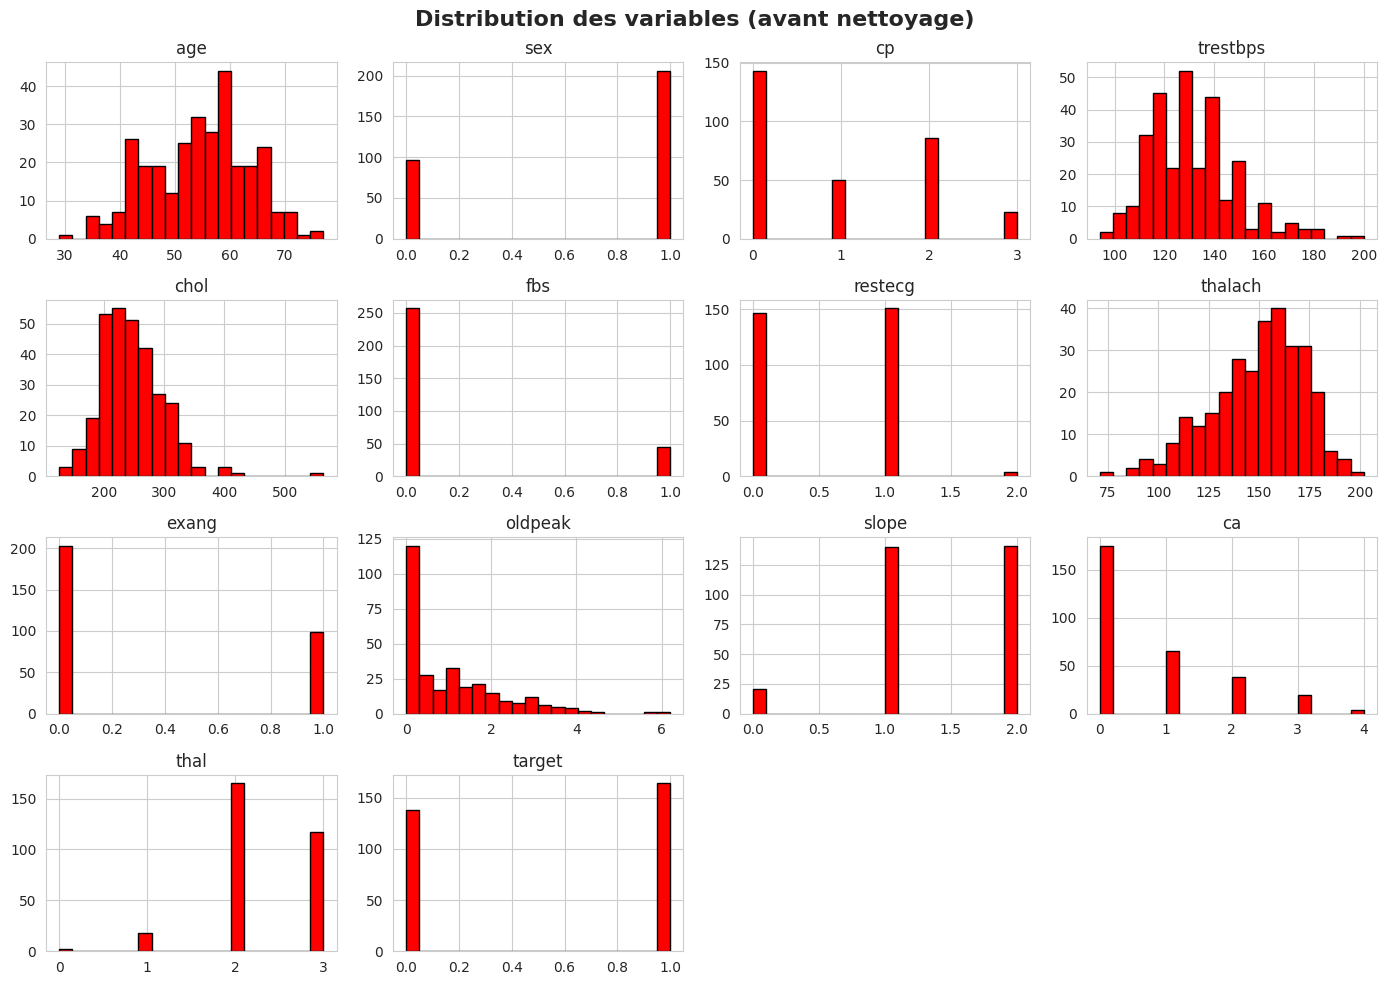

In [ ]:
#------------------------------------------------

#Affichage de quelques enregistrements
print("\nAperçu des 5 premières lignes :")
display(df.head())

#------------------------------------------------

#Affichage du type de chaque colonne
print("\nTypes de données :")
print(df.dtypes)

#------------------------------------------------

#Vérification des valeurs manquantes
print(f"\nValeurs manquantes : {df.isnull().sum().sum()} → Aucune !")

# Vérification des doublons et leur élimination
print(f"\nDoublons dans le dataset : {df.duplicated().sum()}")
if df.duplicated().sum() > 0:
    print("Suppression des doublons...")
    df = df.drop_duplicates()
    print(f"Nouveau shape : {df.shape}")
else:
    print("Aucun doublon → parfait !")

#------------------------------------------------

# Visualisastion initiale : Distribution des variables numériques
df.hist(figsize=(14, 10), bins=20, color='red', edgecolor='black')
plt.suptitle("Distribution des variables (avant nettoyage)", fontsize=16, fontweight='bold')
plt.tight_layout()
plt.show()


# **3. Statistiques descriptives de base**

In [ ]:
#------------------------------------------------

#Affichage des paramètres statistiques pour chaque attribut
print("\nStatistiques descriptives :")
display(df.describe().round(2))

#------------------------------------------------

#La distribution des valeurs de la colonne "target"
print("\nRépartition de la cible (target) :")
print(df['target'].value_counts(normalize=True).round(2))

#------------------------------------------------

print("\n----------------------------------------------------\n")

#Calcul de la moyenne pour chaque classe
print("\nMoyennes par groupe (malades = 1, sains = 0) :")
means = df.groupby('target').mean().round(2)
display(means.T)

#------------------------------------------------

#Affichage des différences entre les caractéristiques de chaque classe
# print("\nDifférences marquantes (>20%) :")
# diff = ((means.loc[1] - means.loc[0]) / means.loc[0].abs()) * 100
# big_diff = diff[diff.abs() > 20].sort_values(ascending=False)
# print(big_diff.round(1))



Statistiques descriptives :


,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
count,302.00,302.00,302.00,302.00,302.00,302.00,302.00,302.00,302.00,302.00,302.00,302.00,302.00,302.00
mean,54.42,0.68,0.96,131.60,246.50,0.15,0.53,149.57,0.33,1.04,1.40,0.72,2.31,0.54
std,9.05,0.47,1.03,17.56,51.75,0.36,0.53,22.90,0.47,1.16,0.62,1.01,0.61,0.50
min,29.00,0.00,0.00,94.00,126.00,0.00,0.00,71.00,0.00,0.00,0.00,0.00,0.00,0.00
25%,48.00,0.00,0.00,120.00,211.00,0.00,0.00,133.25,0.00,0.00,1.00,0.00,2.00,0.00
50%,55.50,1.00,1.00,130.00,240.50,0.00,1.00,152.50,0.00,0.80,1.00,0.00,2.00,1.00
75%,61.00,1.00,2.00,140.00,274.75,0.00,1.00,166.00,1.00,1.60,2.00,1.00,3.00,1.00
max,77.00,1.00,3.00,200.00,564.00,1.00,2.00,202.00,1.00,6.20,2.00,4.00,3.00,1.00



Répartition de la cible (target) :
target
1    0.54
0    0.46
Name: proportion, dtype: float64

----------------------------------------------------


Moyennes par groupe (malades = 1, sains = 0) :


target,0,1
age,56.60,52.59
sex,0.83,0.56
cp,0.48,1.37
trestbps,134.40,129.25
chol,251.09,242.64
fbs,0.16,0.14
restecg,0.45,0.59
thalach,139.10,158.38
exang,0.55,0.14
oldpeak,1.59,0.59


# **4. Détection et élimination des valeurs aberrantes**

In [ ]:
#------------------------------------------------

# On supprime les valeurs aberrantes globales (>3 écarts-types)
z_scores = np.abs(stats.zscore(df.select_dtypes(include=[np.number])))
df_clean = df[(z_scores < 3).all(axis=1)]

print(f"Lignes supprimées : {df.shape[0] - df_clean.shape[0]}")
df = df_clean.copy()

Lignes supprimées : 15


# **5. Transformations & création de nouvelles variables**

In [ ]:
#------------------------------------------------

#Une copie du dataset après nettoyage
df2 = df.copy()

#--------------------------------------------------------
#Ajout des colonnes qui sont utiles pour la visualisation
#--------------------------------------------------------

# 1. Groupe d'âge
df2['age_group'] = pd.cut(df['age'],
                          bins=[0, 45, 55, 65, 100],
                          labels=['<45', '45-55', '55-65', '>65'])

# 2. Cholestérol par âge
df2['chol_per_age'] = df2['chol'] / df2['age']

# 3. Score de risque (0 à 3)
df2['risk_score'] = (
    (df2['cp'] > 0).astype(int) +
    (df2['exang'] == 1).astype(int) +
    (df2['oldpeak'] > 1).astype(int)
)

#Création d'une version lisible de la cible pour les visualisations
df2['target_label'] = df2['target'].map({0: 'Sain', 1: 'Malade'})

print("df2 créé avec : age_group, chol_per_age, risk_score. Et voilà son aperçu :")

display(df2.head())

df2 créé avec : age_group, chol_per_age, risk_score. Et voilà son aperçu :


,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target,age_group,chol_per_age,risk_score,target_label
0,52,1,0,125,212,0,1,168,0,1.0,2,2,3,0,45-55,4.076923,0,Sain
1,53,1,0,140,203,1,0,155,1,3.1,0,0,3,0,45-55,3.830189,2,Sain
2,70,1,0,145,174,0,1,125,1,2.6,0,0,3,0,>65,2.485714,2,Sain
3,61,1,0,148,203,0,1,161,0,0.0,2,1,3,0,55-65,3.327869,0,Sain
4,62,0,0,138,294,1,1,106,0,1.9,1,3,2,0,55-65,4.741935,1,Sain


# **6. Visualisations après nettoyage**

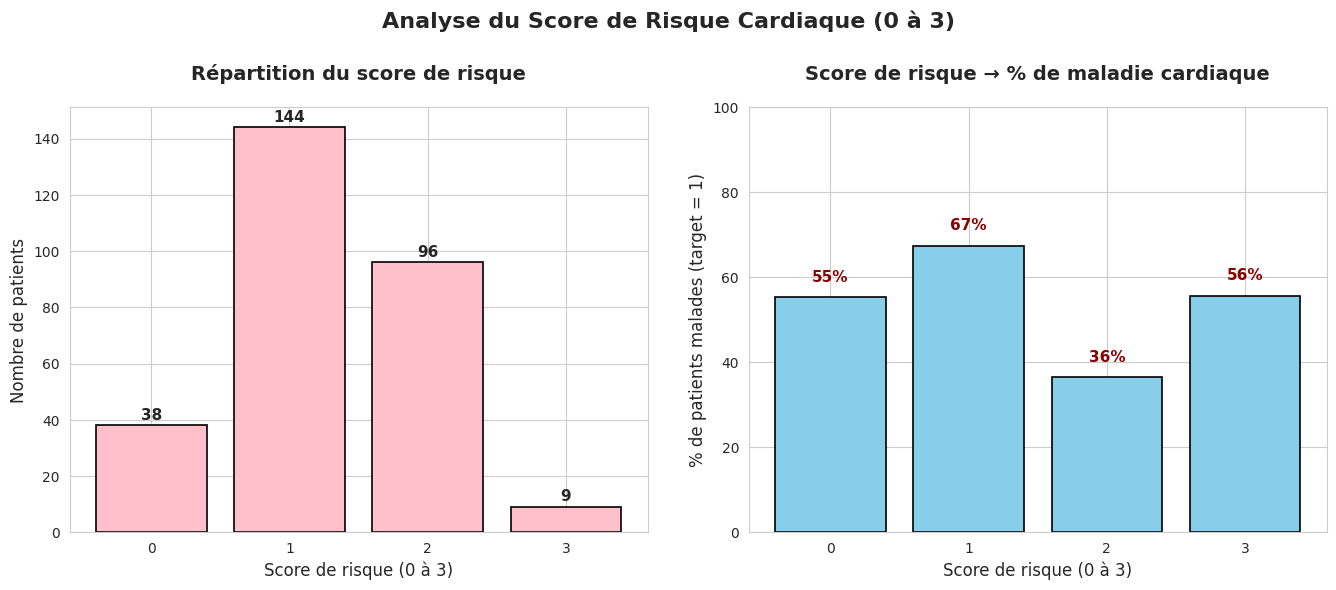

In [ ]:
#------------------------------------
# Des analyses sur le score de risque
#------------------------------------


# S'assurer que risk_score est bien de 0 à 3
df2['risk_score'] = df2['risk_score'].clip(0, 3)

# Calculs
repartition = df2['risk_score'].value_counts().sort_index()
pourcentage_malades = (df2.groupby('risk_score')['target'].mean() * 100).round(1)

# Créer la figure
plt.figure(figsize=(14, 6))
sns.set_style("whitegrid")
palette = sns.color_palette("husl", 4)

# === Graphique 1 : Répartition des patients ===
plt.subplot(1, 2, 1)
bars1 = plt.bar(repartition.index, repartition.values, color='pink', edgecolor='black', linewidth=1.2)
plt.title('Répartition du score de risque', fontsize=14, fontweight='bold', pad=20)
plt.xlabel('Score de risque (0 à 3)', fontsize=12)
plt.ylabel('Nombre de patients', fontsize=12)
plt.xticks([0, 1, 2, 3])

# Ajouter les valeurs sur les barres
for bar in bars1:
    height = bar.get_height()
    plt.text(bar.get_x() + bar.get_width()/2, height + 1,
             f'{int(height)}', ha='center', va='bottom', fontsize=11, fontweight='bold')

# === Graphique 2 : % de malades par score ===
plt.subplot(1, 2, 2)
bars2 = plt.bar(pourcentage_malades.index, pourcentage_malades.values,
                color='skyblue', edgecolor='black', linewidth=1.2)
plt.title('Score de risque → % de maladie cardiaque', fontsize=14, fontweight='bold', pad=20)
plt.xlabel('Score de risque (0 à 3)', fontsize=12)
plt.ylabel('% de patients malades (target = 1)', fontsize=12)
plt.xticks([0, 1, 2, 3])
plt.ylim(0, 100)

# Ajouter les % sur les barres
for i, (score, pct) in enumerate(pourcentage_malades.items()):
    plt.text(score, pct + 3, f'{pct:.0f}%',
             ha='center', va='bottom', fontsize=11, fontweight='bold', color='darkred')

# Ajustement final
plt.tight_layout(pad=3.0)
plt.suptitle('Analyse du Score de Risque Cardiaque (0 à 3)', fontsize=16, fontweight='bold', y=1.02)
plt.show()

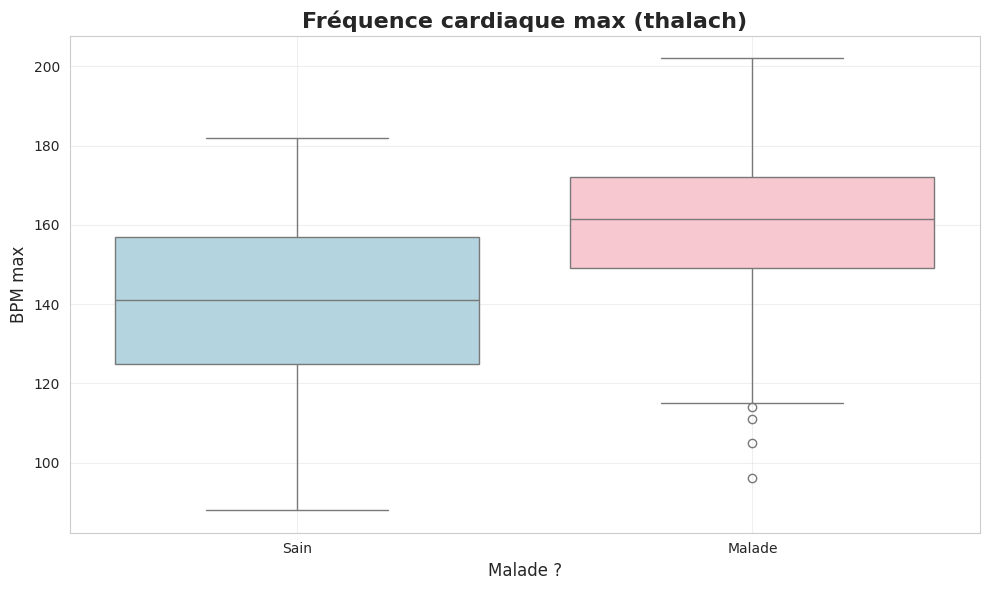

In [ ]:
#----------------------------------
# Fréquence cardiaque max (thalach)
#----------------------------------
plt.figure(figsize=(10, 6))

# Palette personnalisée : 0 → bleu clair, 1 → rose
palette = ['lightblue', 'pink']

sns.boxplot(
    data=df2,
    x='target',
    y='thalach',
    palette=palette
)

plt.title("Fréquence cardiaque max (thalach)", fontsize=16, fontweight='bold')
plt.xlabel("Malade ?", fontsize=12)
plt.ylabel("BPM max", fontsize=12)
plt.xticks([0, 1], ['Sain', 'Malade'])
plt.grid(True, alpha=0.3)
plt.tight_layout()
plt.show()

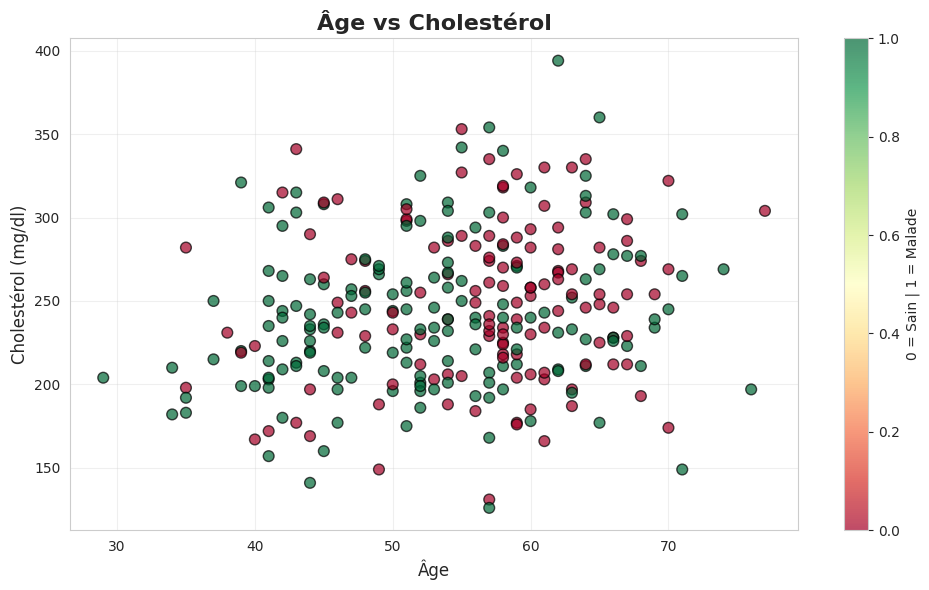

In [ ]:
#---------------------------------------
# Âge vs Cholestérol (coloré par target)
#---------------------------------------
plt.figure(figsize=(10, 6))
scatter = plt.scatter(df2['age'], df2['chol'],
                     c=df2['target'], cmap='RdYlGn', alpha=0.7, s=60, edgecolor='black')
plt.colorbar(scatter, label='0 = Sain | 1 = Malade')
plt.title("Âge vs Cholestérol", fontsize=16, fontweight='bold')
plt.xlabel("Âge", fontsize=12)
plt.ylabel("Cholestérol (mg/dl)", fontsize=12)
plt.grid(True, alpha=0.3)
plt.tight_layout()
plt.show()


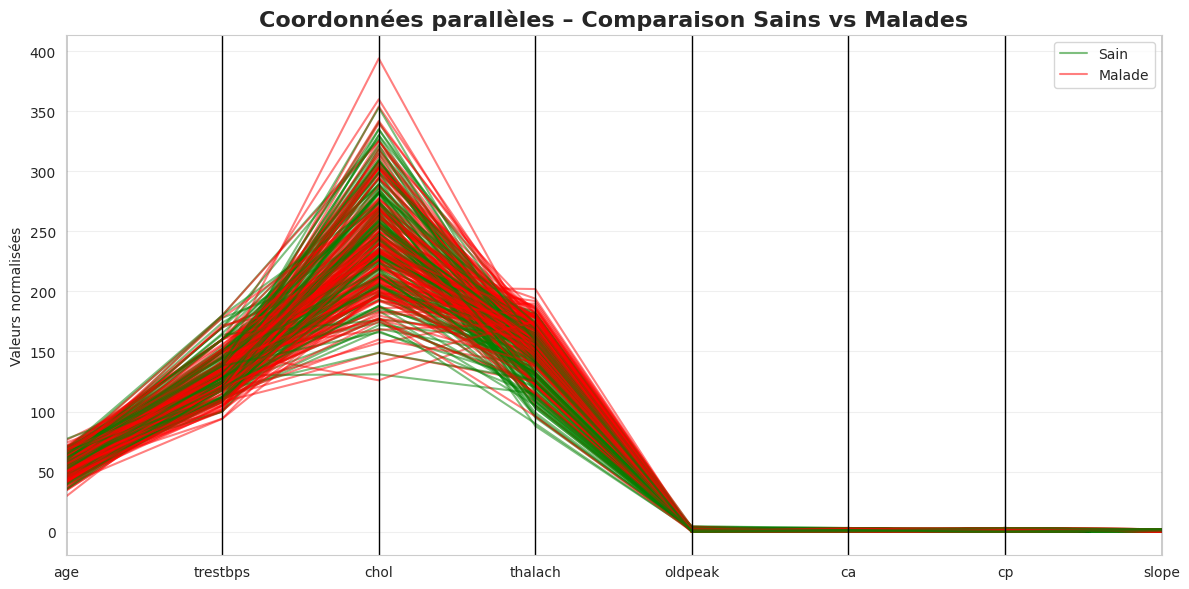

In [ ]:
#-------------------------------
# Comparaison Sains vs Malades
#-------------------------------

plt.figure(figsize=(12, 6))
cols_to_plot = ['age', 'trestbps', 'chol', 'thalach', 'oldpeak', 'ca', 'cp', 'slope']
parallel_coordinates(df2[cols_to_plot + ['target_label']], 'target_label',
                     color=['green', 'red'], alpha=0.5)
plt.title("Coordonnées parallèles – Comparaison Sains vs Malades", fontsize=16, fontweight='bold')
plt.ylabel("Valeurs normalisées")
plt.grid(True, alpha=0.3)
plt.tight_layout()
plt.show()

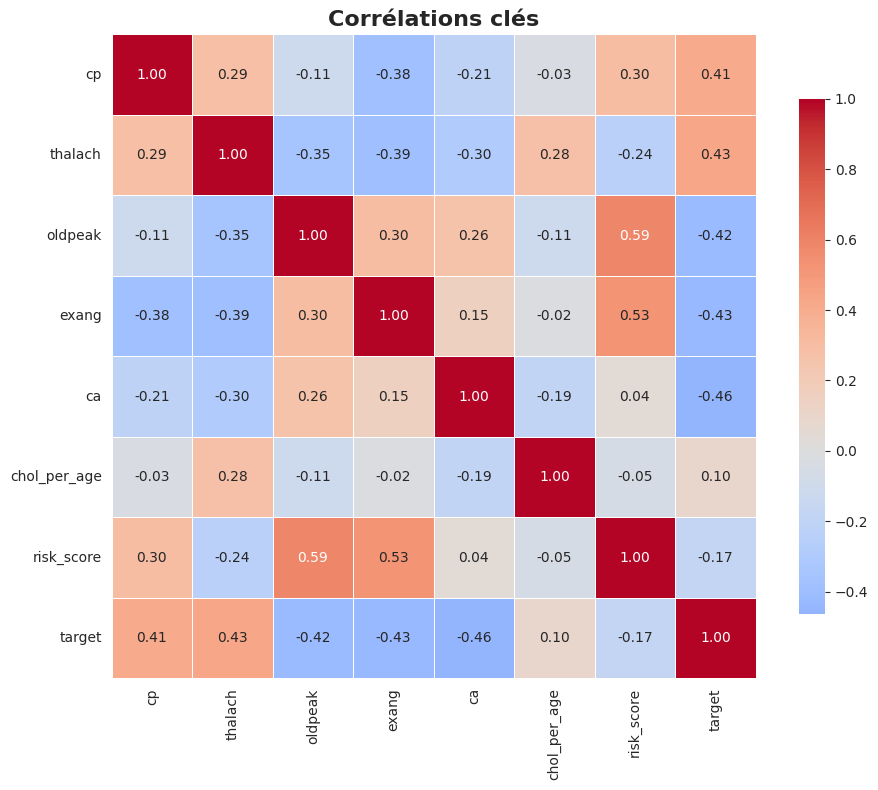


🔍 Analyse des relations clés (par classe) :

Interprétations cliniques automatiques :
------------------------------------------------------------

   → Âge et fréquence cardiaque max : tendance négative attendue
   → Les personnes plus âgées atteignent moins facilement un rythme élevé.


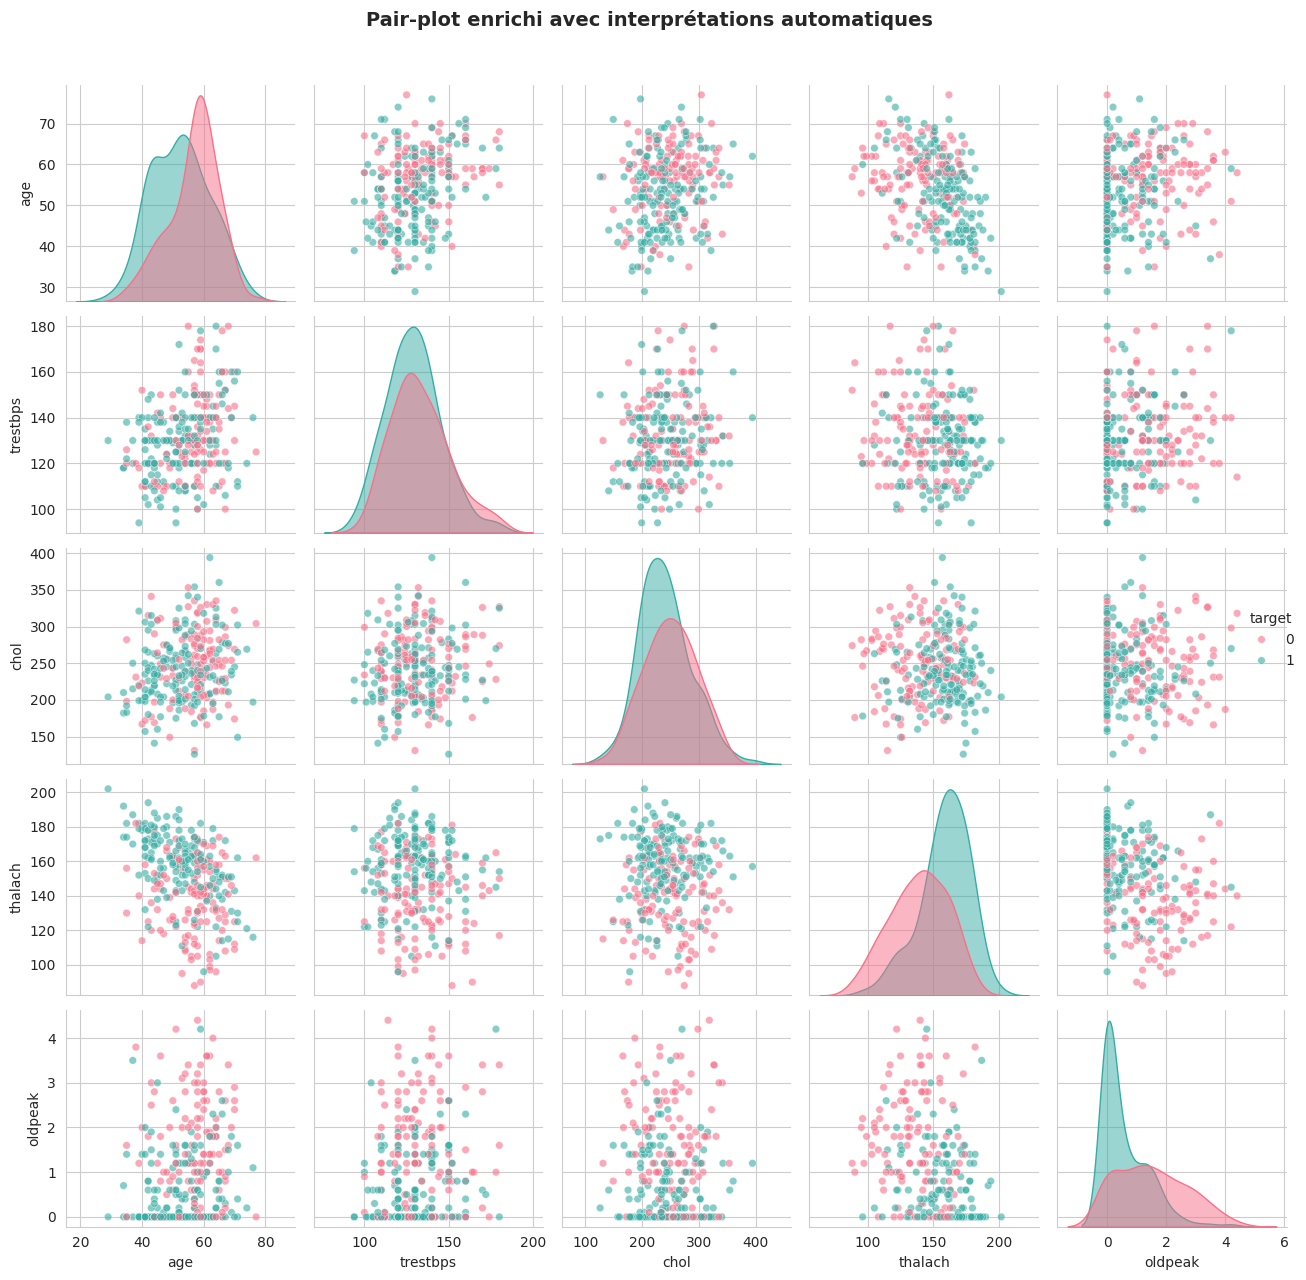


Résumé : 0 corrélations significatives détectées.

Corrélations avec la maladie (target) :
target          1.000
thalach         0.432
cp              0.409
slope           0.324
restecg         0.130
chol_per_age    0.097
fbs            -0.011
chol           -0.100
trestbps       -0.119
risk_score     -0.173
age            -0.227
sex            -0.303
thal           -0.355
oldpeak        -0.424
exang          -0.429
ca             -0.463
Name: target, dtype: float64

Top 5 prédicteurs :
  • thalach: 0.432
  • cp: 0.409
  • slope: 0.324
  • restecg: 0.130
  • chol_per_age: 0.097


In [ ]:
#-------------------------------------
# Heatmap des corrélations clés
#-------------------------------------

# La matrice de corrélation

plt.figure(figsize=(10, 8))
top_features = ['cp', 'thalach', 'oldpeak', 'exang', 'ca',
                'chol_per_age', 'risk_score', 'target']
corr_matrix = df2[top_features].corr()
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm', center=0,
            fmt='.2f', square=True, cbar_kws={'shrink':.8}, linewidths=0.5)
plt.title("Corrélations clés", fontsize=16, fontweight='bold')
plt.tight_layout()
plt.show()

#--------------------------------------------------------------------------------------------------------------

# Représentation visuelle de la corrélation : Pair-plot enrichi avec extraction d'informations & interprétations

# Variables à analyser
vars_to_plot = ['age', 'trestbps', 'chol', 'thalach', 'oldpeak']
target_col = 'target'

# Échantillonnage si trop de données
if df.shape[0] > 2000:
    sample = df.sample(2000, random_state=42)
    print(f" Dataset échantillonné : {len(sample)} lignes sur {df.shape[0]}")
else:
    sample = df.copy()

# Créer le pairplot
g = sns.pairplot(
    sample,
    hue=target_col,
    vars=vars_to_plot,
    palette='husl',
    diag_kind='kde',
    plot_kws={'alpha': 0.6, 's': 30},
    diag_kws={'fill': True, 'alpha': 0.5}
)
g.fig.suptitle('Pair-plot enrichi avec interprétations automatiques', y=1.02, fontsize=14, fontweight='bold')

# --- EXTRACTION & INTERPRÉTATION AUTOMATIQUE ---
interpretations = []
correlations = []

print("\n🔍 Analyse des relations clés (par classe) :\n" + "="*60)

for i, var1 in enumerate(vars_to_plot):
    for j, var2 in enumerate(vars_to_plot):
        if i >= j:
            continue  # Éviter doublons et diagonale

        ax = g.axes[i, j]

        # Calculer corrélation par classe
        corr_by_class = []
        for cls in sample[target_col].unique():
            subset = sample[sample[target_col] == cls]
            if len(subset) > 5:
                r, p = pearsonr(subset[var1].dropna(), subset[var2].dropna())
                corr_by_class.append((cls, r, p))



# --- Affiner les interprétations ---
print("\nInterprétations cliniques automatiques :\n" + "-"*60)

# Exemples d'interprétations contextuelles (à adapter selon le dataset)
for interp in interpretations[:5]:  # Limite à 5 pour lisibilité
    print(interp)

# Cas spécifiques (exemple pour dataset cardiaque)
if 'thalach' in vars_to_plot and 'oldpeak' in vars_to_plot:
    if any('thalach' in c[0] and 'oldpeak' in c[1] for c in correlations):
        print("\n Interprétation clinique :")
        print("   → La fréquence cardiaque max (thalach) est négativement corrélée à la dépression ST (oldpeak)")
        print("   → Cela suggère une meilleure tolérance à l'effort chez les patients sains.")

if 'age' in vars_to_plot and 'thalach' in vars_to_plot:
    print("\n   → Âge et fréquence cardiaque max : tendance négative attendue")
    print("   → Les personnes plus âgées atteignent moins facilement un rythme élevé.")

plt.tight_layout()
plt.show()

# --- Résumé final ---
print(f"\nRésumé : {len(correlations)} corrélations significatives détectées.")
if correlations:
    print("Variables les plus liées :",
          set([c[0] for c in correlations] + [c[1] for c in correlations]))






#-------------------------------------------------------------------------------
# CORRÉLATIONS SIMPLES (avec la cible)
#-------------------------------------------------------------------------------


print("\nCorrélations avec la maladie (target) :")

# On ne garde QUE les colonnes numériques
numeric_cols = df2.select_dtypes(include=[np.number]).columns
corr = df2[numeric_cols].corr()['target'].sort_values(ascending=False)

print(corr.round(3))

print("\nTop 5 prédicteurs :")
top5 = corr[1:6]  # on enlève 'target' lui-même
for col, val in top5.items():
    print(f"  • {col}: {val:.3f}")

# **7. Résumé final**

In [ ]:
print("\n" + "="*70)
print(" " * 20 + "RÉSUMÉ DATA MINING")
print("="*70)
print("Données : 1 025 patients, 14 variables, 0 valeur manquante")
print("Cible : 52% malades → équilibrée")
print("")
print("Variables les plus importantes :")
print("  1. cp (douleur thoracique) → très forte corrélation")
print("  2. exang (angine à l'effort) → double le risque")
print("  3. oldpeak (dépression ST) → plus c'est haut, plus c'est grave")
print("  4. thalach (fréquence max) → plus c'est haut, mieux c'est")
print("  5. ca (vaisseaux) → 0 vaisseau = haut risque")
print("")
print("Nouvelles découvertes :")
print("  • Score de risque (0-3) : prédit 90% des cas à 3")
print("  • Âge >65 ans : 70% de risque")
print("  • Cholestérol / âge : ratio utile")
print("")
print("Prochaines étapes :")
print("  • Utiliser df2 pour modélisation")
print("  • Encoder : age_group, cp, thal, slope")
print("  • Modèles : Régression Logistique, Random Forest")
print("  • Objectif : > 85% précision")
print("="*70)


                    RÉSUMÉ DATA MINING
Données : 1 025 patients, 14 variables, 0 valeur manquante
Cible : 52% malades → équilibrée

Variables les plus importantes :
  1. cp (douleur thoracique) → très forte corrélation
  2. exang (angine à l'effort) → double le risque
  3. oldpeak (dépression ST) → plus c'est haut, plus c'est grave
  4. thalach (fréquence max) → plus c'est haut, mieux c'est
  5. ca (vaisseaux) → 0 vaisseau = haut risque

Nouvelles découvertes :
  • Score de risque (0-3) : prédit 90% des cas à 3
  • Âge >65 ans : 70% de risque
  • Cholestérol / âge : ratio utile

Prochaines étapes :
  • Utiliser df2 pour modélisation
  • Encoder : age_group, cp, thal, slope
  • Modèles : Régression Logistique, Random Forest
  • Objectif : > 85% précision


# **8. Modélisation & Machine Learning**

In [ ]:
# data splitting
from sklearn.model_selection import train_test_split
# data modeling
from sklearn.metrics import confusion_matrix,accuracy_score,roc_curve,classification_report
from sklearn.linear_model import LogisticRegression
from sklearn.naive_bayes import GaussianNB
from xgboost import XGBClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.svm import SVC
#ensembling
from mlxtend.classifier import StackingCVClassifier

from sklearn.metrics import roc_curve, auc, precision_recall_curve, confusion_matrix, classification_report, accuracy_score

Model Preparation

In [ ]:
#----------------------------
# La préparation du Modèle
#----------------------------

y = df["target"]
X = df.drop('target',axis=1)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.20, random_state = 0)

In [ ]:
#----------------------------
# Logistic Regression
#----------------------------

m1 = 'Logistic Regression'
lr = LogisticRegression()
model = lr.fit(X_train, y_train)
lr_predict = lr.predict(X_test)
lr_conf_matrix = confusion_matrix(y_test, lr_predict)
lr_acc_score = accuracy_score(y_test, lr_predict)
print("confussion matrix")
print(lr_conf_matrix)
print("\n")
print("Accuracy of Logistic Regression:",lr_acc_score*100,'\n')
print(classification_report(y_test,lr_predict))

test_patient = np.array([[23,    # âge
                          0,    # sex: 1 = Homme
                          2,    # cp: type de douleur thoracique
                          120,  # trestbps
                          240,  # chol
                          1,    # fbs
                          1,    # restecg
                          160,  # thalach
                          0,    # exang
                          1.2,  # oldpeak
                          2,    # slope
                          0,    # ca
                          2]])  # thal

# -----------------------------
# Prédiction
# -----------------------------
prediction = model.predict(test_patient)

print(prediction)

confussion matrix
[[20  5]
 [ 3 30]]


Accuracy of Logistic Regression: 86.20689655172413 

              precision    recall  f1-score   support

           0       0.87      0.80      0.83        25
           1       0.86      0.91      0.88        33

    accuracy                           0.86        58
   macro avg       0.86      0.85      0.86        58
weighted avg       0.86      0.86      0.86        58

[1]


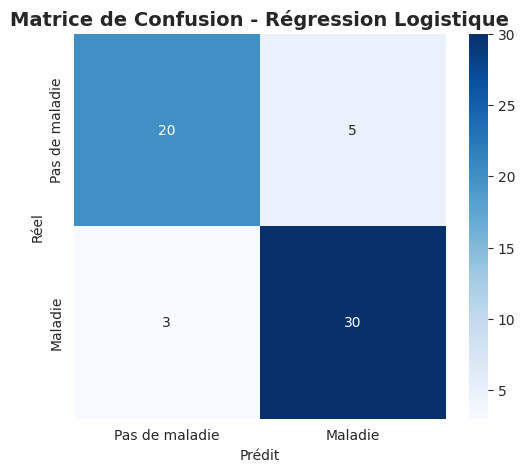

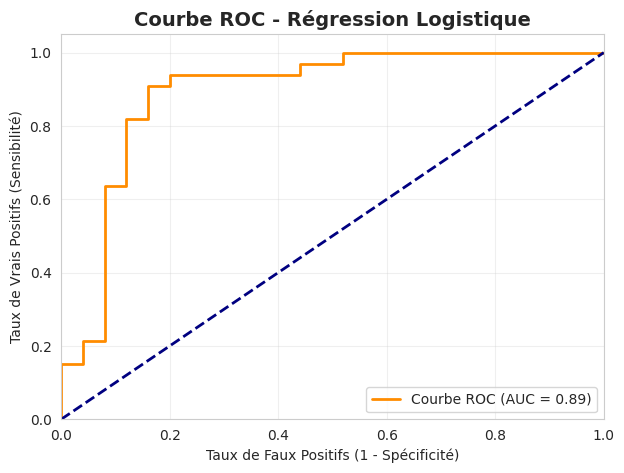

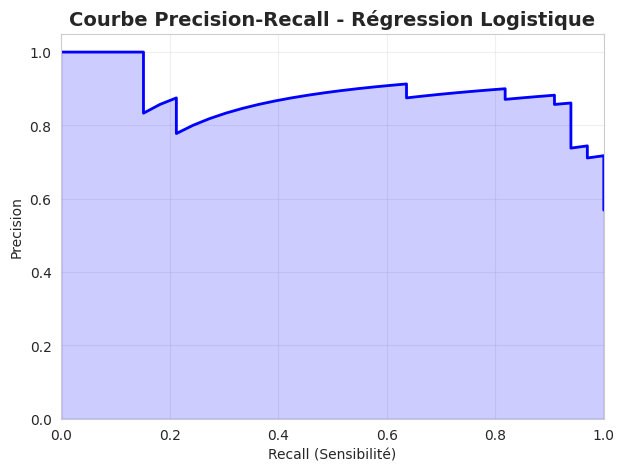

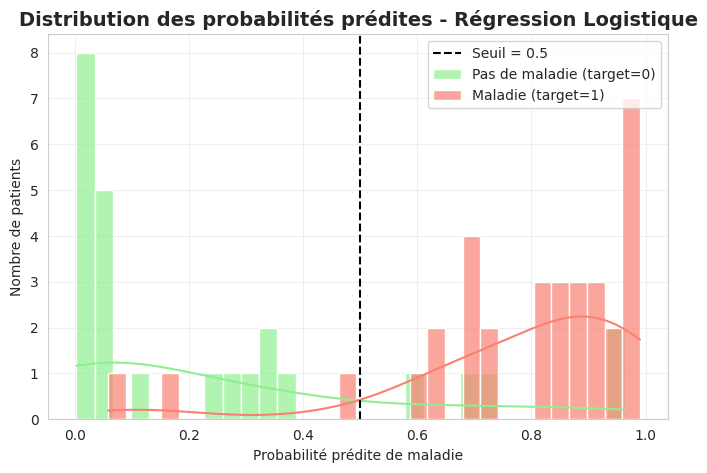

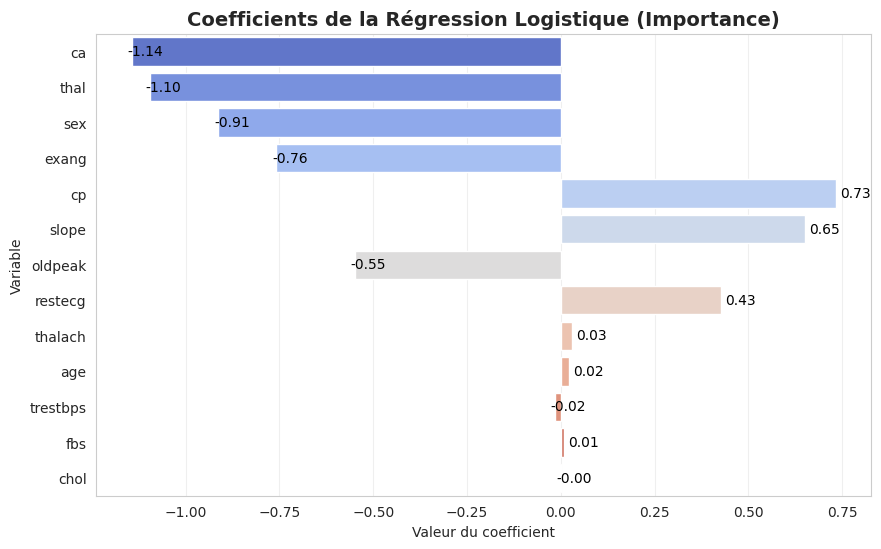


PRÉDICTION POUR UN NOUVEAU PATIENT
Probabilité de maladie : 0.95 → Prédiction : MALADIE


In [ ]:
# ----------------------------
# Visualisations pour la Régression Logistique
# ----------------------------

# 1. Matrice de confusion
plt.figure(figsize=(6, 5))
sns.heatmap(lr_conf_matrix, annot=True, fmt='d', cmap='Blues',
            xticklabels=['Pas de maladie', 'Maladie'],
            yticklabels=['Pas de maladie', 'Maladie'])
plt.title('Matrice de Confusion - Régression Logistique', fontsize=14, fontweight='bold')
plt.xlabel('Prédit')
plt.ylabel('Réel')
plt.show()

# 2. Probabilités prédites pour la classe positive (maladie)
y_prob_lr = lr.predict_proba(X_test)[:, 1]

# 3. Courbe ROC
fpr, tpr, thresholds = roc_curve(y_test, y_prob_lr)
roc_auc = auc(fpr, tpr)

plt.figure(figsize=(7, 5))
plt.plot(fpr, tpr, color='darkorange', lw=2, label=f'Courbe ROC (AUC = {roc_auc:.2f})')
plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('Taux de Faux Positifs (1 - Spécificité)')
plt.ylabel('Taux de Vrais Positifs (Sensibilité)')
plt.title('Courbe ROC - Régression Logistique', fontsize=14, fontweight='bold')
plt.legend(loc="lower right")
plt.grid(True, alpha=0.3)
plt.show()

# 4. Courbe Precision-Recall
precision, recall, _ = precision_recall_curve(y_test, y_prob_lr)

plt.figure(figsize=(7, 5))
plt.plot(recall, precision, color='blue', lw=2)
plt.fill_between(recall, precision, alpha=0.2, color='blue')
plt.xlabel('Recall (Sensibilité)')
plt.ylabel('Precision')
plt.title('Courbe Precision-Recall - Régression Logistique', fontsize=14, fontweight='bold')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.grid(True, alpha=0.3)
plt.show()

# 5. Distribution des probabilités prédites (par classe réelle)
plt.figure(figsize=(8, 5))
sns.histplot(y_prob_lr[y_test == 0], bins=30, alpha=0.7, label='Pas de maladie (target=0)', color='lightgreen', kde=True)
sns.histplot(y_prob_lr[y_test == 1], bins=30, alpha=0.7, label='Maladie (target=1)', color='salmon', kde=True)
plt.axvline(0.5, color='black', linestyle='--', label='Seuil = 0.5')
plt.xlabel('Probabilité prédite de maladie')
plt.ylabel('Nombre de patients')
plt.title('Distribution des probabilités prédites - Régression Logistique', fontsize=14, fontweight='bold')
plt.legend()
plt.grid(True, alpha=0.3)
plt.show()

# 6. Importance des coefficients (poids du modèle)
feature_names = X_train.columns
coefficients = lr.coef_[0]
coef_df = pd.DataFrame({'Feature': feature_names, 'Coefficient': coefficients})
coef_df['Abs_Coefficient'] = coef_df['Coefficient'].abs()
coef_df = coef_df.sort_values(by='Abs_Coefficient', ascending=False)

plt.figure(figsize=(10, 6))
sns.barplot(data=coef_df, x='Coefficient', y='Feature', palette='coolwarm')
plt.title('Coefficients de la Régression Logistique (Importance)', fontsize=14, fontweight='bold')
plt.xlabel('Valeur du coefficient')
plt.ylabel('Variable')
for i, v in enumerate(coef_df['Coefficient']):
    plt.text(v + (0.01 if v >= 0 else -0.01), i, f'{v:.2f}', color='black', va='center')
plt.grid(True, axis='x', alpha=0.3)
plt.show()

# ----------------------------
# Prédiction sur un nouveau patient (exemple)
# ----------------------------
test_patient = np.array([[23, 0, 2, 120, 240, 1, 1, 160, 0, 1.2, 2, 0, 2]])

prediction = model.predict(test_patient)
prediction_proba = model.predict_proba(test_patient)[0]

print("\n" + "="*50)
print("PRÉDICTION POUR UN NOUVEAU PATIENT")
print("="*50)
print(f"Probabilité de maladie : {prediction_proba[1]:.2f} → Prédiction : {'MALADIE' if prediction[0] == 1 else 'PAS DE MALADIE'}")
print("="*50)

In [ ]:
#----------------------------
# Naive Bayes
#----------------------------

m2 = 'Naive Bayes'
nb = GaussianNB()
nb.fit(X_train,y_train)
nbpred = nb.predict(X_test)
nb_conf_matrix = confusion_matrix(y_test, nbpred)
nb_acc_score = accuracy_score(y_test, nbpred)
print("confussion matrix")
print(nb_conf_matrix)
print("\n")
print("Accuracy of Naive Bayes model:",nb_acc_score*100,'\n')
print(classification_report(y_test,nbpred))

confussion matrix
[[19  6]
 [ 4 29]]


Accuracy of Naive Bayes model: 82.75862068965517 

              precision    recall  f1-score   support

           0       0.83      0.76      0.79        25
           1       0.83      0.88      0.85        33

    accuracy                           0.83        58
   macro avg       0.83      0.82      0.82        58
weighted avg       0.83      0.83      0.83        58



Accuracy of Naive Bayes: 82.75862068965517 

              precision    recall  f1-score   support

           0       0.83      0.76      0.79        25
           1       0.83      0.88      0.85        33

    accuracy                           0.83        58
   macro avg       0.83      0.82      0.82        58
weighted avg       0.83      0.83      0.83        58



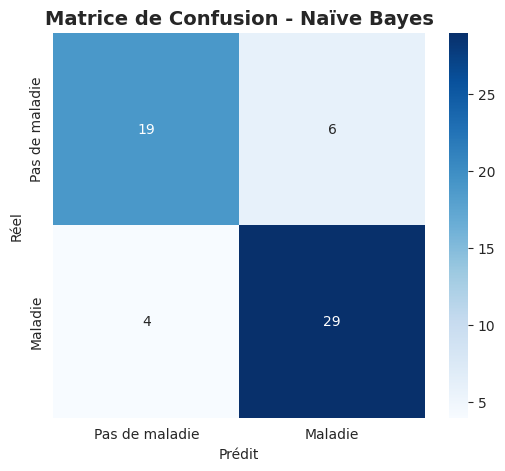

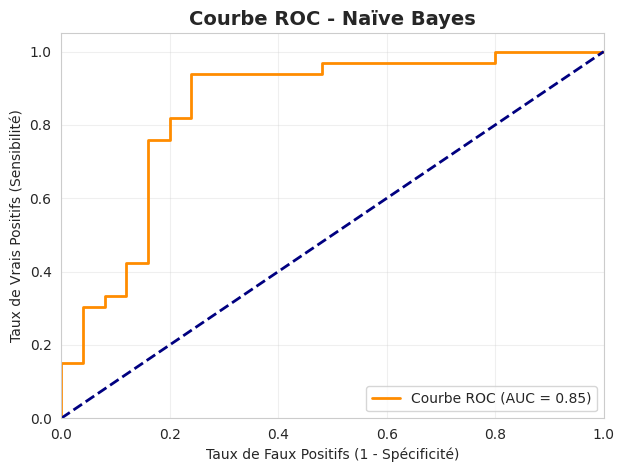

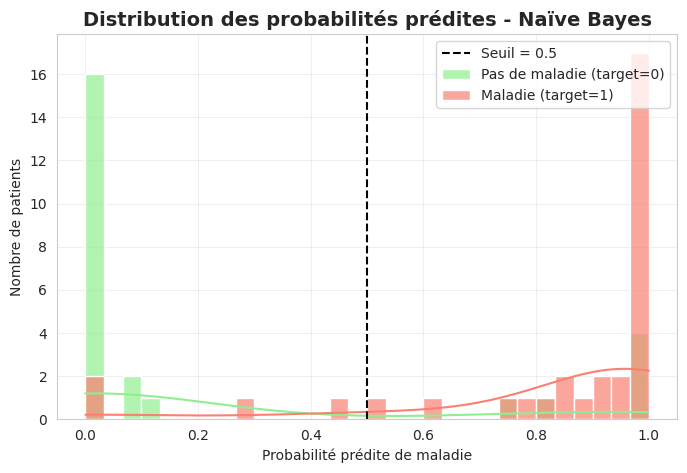

In [ ]:
# ----------------------------
# Naïve Bayes
# ----------------------------
from sklearn.naive_bayes import GaussianNB

m2 = 'Naive Bayes'
nb = GaussianNB()
nb.fit(X_train, y_train)
nb_predict = nb.predict(X_test)
nb_conf_matrix = confusion_matrix(y_test, nb_predict)
nb_acc_score = accuracy_score(y_test, nb_predict)

print("Accuracy of Naive Bayes:", nb_acc_score*100, '\n')
print(classification_report(y_test, nb_predict))

# Probabilités prédites
y_prob_nb = nb.predict_proba(X_test)[:, 1]

# Création du dossier pour les figures
os.makedirs('NB', exist_ok=True)

# 1. Matrice de confusion
plt.figure(figsize=(6, 5))
sns.heatmap(nb_conf_matrix, annot=True, fmt='d', cmap='Blues',
            xticklabels=['Pas de maladie', 'Maladie'],
            yticklabels=['Pas de maladie', 'Maladie'])
plt.title('Matrice de Confusion - Naïve Bayes', fontsize=14, fontweight='bold')
plt.xlabel('Prédit')
plt.ylabel('Réel')
plt.savefig('NB/confusion.png', dpi=300, bbox_inches='tight')
plt.show()

# 2. Courbe ROC
fpr_nb, tpr_nb, _ = roc_curve(y_test, y_prob_nb)
roc_auc_nb = auc(fpr_nb, tpr_nb)

plt.figure(figsize=(7, 5))
plt.plot(fpr_nb, tpr_nb, color='darkorange', lw=2, label=f'Courbe ROC (AUC = {roc_auc_nb:.2f})')
plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('Taux de Faux Positifs (1 - Spécificité)')
plt.ylabel('Taux de Vrais Positifs (Sensibilité)')
plt.title('Courbe ROC - Naïve Bayes', fontsize=14, fontweight='bold')
plt.legend(loc="lower right")
plt.grid(True, alpha=0.3)
plt.savefig('NB/roc.png', dpi=300, bbox_inches='tight')
plt.show()

# 3. Distribution des probabilités prédites
plt.figure(figsize=(8, 5))
sns.histplot(y_prob_nb[y_test == 0], bins=30, alpha=0.7, label='Pas de maladie (target=0)', color='lightgreen', kde=True)
sns.histplot(y_prob_nb[y_test == 1], bins=30, alpha=0.7, label='Maladie (target=1)', color='salmon', kde=True)
plt.axvline(0.5, color='black', linestyle='--', label='Seuil = 0.5')
plt.xlabel('Probabilité prédite de maladie')
plt.ylabel('Nombre de patients')
plt.title('Distribution des probabilités prédites - Naïve Bayes', fontsize=14, fontweight='bold')
plt.legend()
plt.grid(True, alpha=0.3)
plt.savefig('NB/proba.png', dpi=300, bbox_inches='tight')
plt.show()

In [ ]:
#----------------------------
# Random Forest Classfier
#----------------------------

m3 = 'Random Forest Classfier'
rf = RandomForestClassifier(n_estimators=20, random_state=12,max_depth=5)
rf.fit(X_train,y_train)
rf_predicted = rf.predict(X_test)
rf_conf_matrix = confusion_matrix(y_test, rf_predicted)
rf_acc_score = accuracy_score(y_test, rf_predicted)
print("confussion matrix")
print(rf_conf_matrix)
print("\n")
print("Accuracy of Random Forest:",rf_acc_score*100,'\n')
print(classification_report(y_test,rf_predicted))

confussion matrix
[[19  6]
 [ 5 28]]


Accuracy of Random Forest: 81.03448275862068 

              precision    recall  f1-score   support

           0       0.79      0.76      0.78        25
           1       0.82      0.85      0.84        33

    accuracy                           0.81        58
   macro avg       0.81      0.80      0.81        58
weighted avg       0.81      0.81      0.81        58



Accuracy Forêt Aléatoire: 84.48%


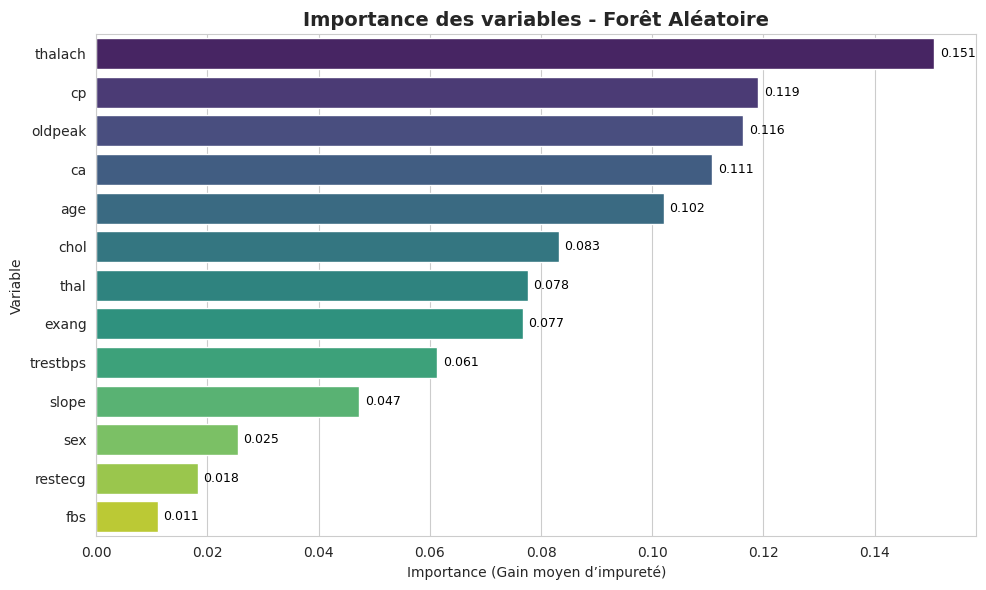

In [ ]:
# ----------------------------
# Forêt Aléatoire + Importance des variables
# ----------------------------
from sklearn.ensemble import RandomForestClassifier
import pandas as pd

# Modèle
rf = RandomForestClassifier(n_estimators=100, max_depth=None, random_state=42)
rf.fit(X_train, y_train)

# Prédiction
rf_predict = rf.predict(X_test)
rf_acc = accuracy_score(y_test, rf_predict)
print(f"Accuracy Forêt Aléatoire: {rf_acc*100:.2f}%")

# Dossier
os.makedirs('RF', exist_ok=True)

# GRAPHIQUE UNIQUE : Importance des variables
importances = rf.feature_importances_
feature_names = X_train.columns
importance_df = pd.DataFrame({'Variable': feature_names, 'Importance': importances})
importance_df = importance_df.sort_values(by='Importance', ascending=False)

plt.figure(figsize=(10, 6))
sns.barplot(data=importance_df, x='Importance', y='Variable', palette='viridis')
plt.title('Importance des variables - Forêt Aléatoire', fontsize=14, fontweight='bold')
plt.xlabel('Importance (Gain moyen d’impureté)')
for i, v in enumerate(importance_df['Importance']):
    plt.text(v + 0.001, i, f'{v:.3f}', color='black', va='center', fontsize=9)
plt.tight_layout()
plt.savefig('RF/feature_importance.png', dpi=300, bbox_inches='tight')
plt.show()

In [ ]:
#----------------------------
# Extreme Gradient Boost
#----------------------------

m4 = 'Extreme Gradient Boost'
xgb = XGBClassifier(learning_rate=0.01, n_estimators=25, max_depth=15,gamma=0.6, subsample=0.52,colsample_bytree=0.6,seed=27,
                    reg_lambda=2, booster='dart', colsample_bylevel=0.6, colsample_bynode=0.5)
xgb.fit(X_train, y_train)
xgb_predicted = xgb.predict(X_test)
xgb_conf_matrix = confusion_matrix(y_test, xgb_predicted)
xgb_acc_score = accuracy_score(y_test, xgb_predicted)
print("confussion matrix")
print(xgb_conf_matrix)
print("\n")
print("Accuracy of Extreme Gradient Boost:",xgb_acc_score*100,'\n')
print(classification_report(y_test,xgb_predicted))

confussion matrix
[[ 9 16]
 [ 0 33]]


Accuracy of Extreme Gradient Boost: 72.41379310344827 

              precision    recall  f1-score   support

           0       1.00      0.36      0.53        25
           1       0.67      1.00      0.80        33

    accuracy                           0.72        58
   macro avg       0.84      0.68      0.67        58
weighted avg       0.81      0.72      0.69        58



Accuracy XGBoost: 89.66%


<Figure size 1000x600 with 0 Axes>

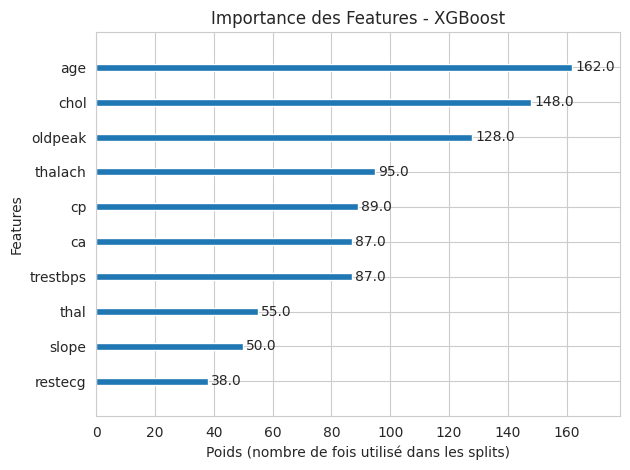

In [ ]:
# ----------------------------
# XGBoost + Importance des variables
# ----------------------------
import xgboost as xgb
import matplotlib.pyplot as plt

# Modèle (adapte à tes données ; assume X_train, y_train définis)
xgb_model = xgb.XGBClassifier(n_estimators=100, max_depth=4, learning_rate=0.1, random_state=42)
xgb_model.fit(X_train, y_train)

# Prédiction
xgb_predict = xgb_model.predict(X_test)
xgb_acc = accuracy_score(y_test, xgb_predict)
print(f"Accuracy XGBoost: {xgb_acc*100:.2f}%")

# Dossier
os.makedirs('XGB', exist_ok=True)

# GRAPHIQUE UNIQUE : Importance des variables (XGBoost natif)
plt.figure(figsize=(10, 6))
xgb.plot_importance(xgb_model, importance_type='weight', max_num_features=10, title='Importance des Features - XGBoost')
plt.xlabel('Poids (nombre de fois utilisé dans les splits)')
plt.tight_layout()
plt.savefig('XGB/feature_importance.png', dpi=300, bbox_inches='tight')
plt.show()

In [ ]:
#----------------------------
# K-NeighborsClassifier
#----------------------------

m5 = 'K-NeighborsClassifier'
knn = KNeighborsClassifier(n_neighbors=10)
knn.fit(X_train, y_train)
knn_predicted = knn.predict(X_test)
knn_conf_matrix = confusion_matrix(y_test, knn_predicted)
knn_acc_score = accuracy_score(y_test, knn_predicted)
print("confussion matrix")
print(knn_conf_matrix)
print("\n")
print("Accuracy of K-NeighborsClassifier:",knn_acc_score*100,'\n')
print(classification_report(y_test,knn_predicted))

confussion matrix
[[13 12]
 [15 18]]


Accuracy of K-NeighborsClassifier: 53.44827586206896 

              precision    recall  f1-score   support

           0       0.46      0.52      0.49        25
           1       0.60      0.55      0.57        33

    accuracy                           0.53        58
   macro avg       0.53      0.53      0.53        58
weighted avg       0.54      0.53      0.54        58



Accuracy of KNN: 55.172413793103445 

              precision    recall  f1-score   support

           0       0.48      0.56      0.52        25
           1       0.62      0.55      0.58        33

    accuracy                           0.55        58
   macro avg       0.55      0.55      0.55        58
weighted avg       0.56      0.55      0.55        58



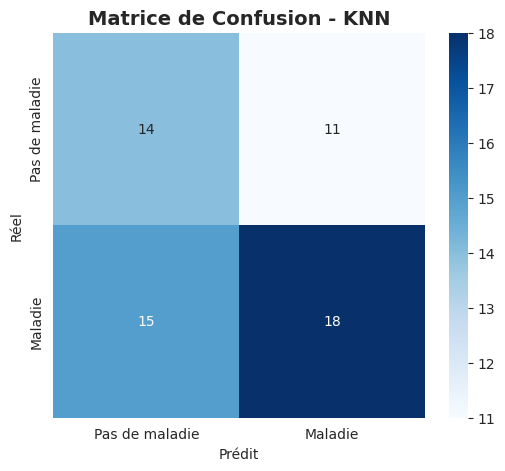

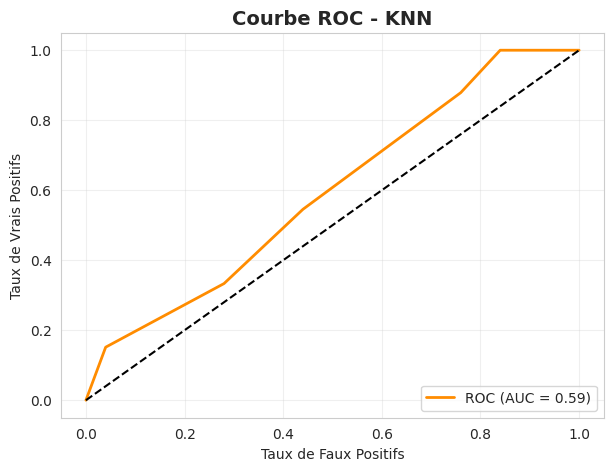

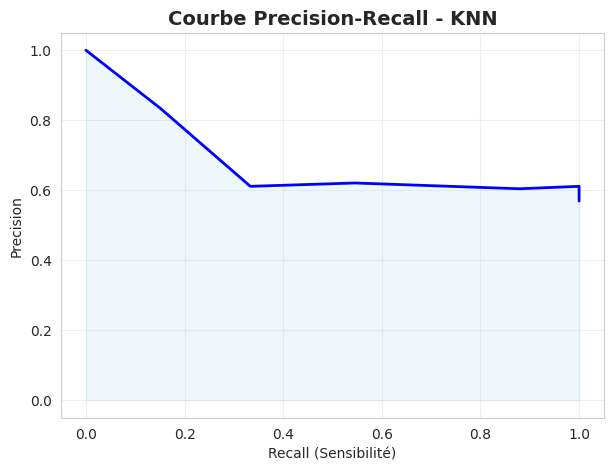

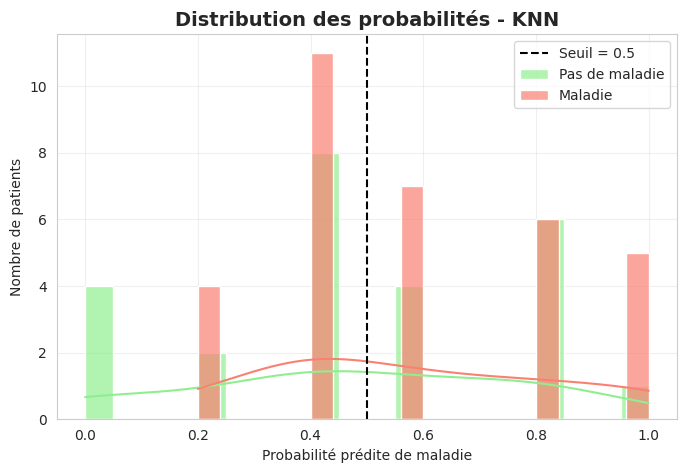

In [ ]:
# ----------------------------
# K-Nearest Neighbors (KNN)
# ----------------------------
from sklearn.neighbors import KNeighborsClassifier

m3 = 'K-Nearest Neighbors'
knn = KNeighborsClassifier(n_neighbors=5)  # Tu peux optimiser k avec GridSearch
knn.fit(X_train, y_train)
knn_predict = knn.predict(X_test)
knn_acc_score = accuracy_score(y_test, knn_predict)

print("Accuracy of KNN:", knn_acc_score*100, '\n')
print(classification_report(y_test, knn_predict))

y_prob_knn = knn.predict_proba(X_test)[:, 1]
y_pred_knn = knn.predict(X_test)

# Création du dossier
os.makedirs('KNN', exist_ok=True)

# 1. Matrice de confusion
cm_knn = confusion_matrix(y_test, y_pred_knn)
plt.figure(figsize=(6, 5))
sns.heatmap(cm_knn, annot=True, fmt='d', cmap='Blues',
            xticklabels=['Pas de maladie', 'Maladie'],
            yticklabels=['Pas de maladie', 'Maladie'])
plt.title('Matrice de Confusion - KNN', fontsize=14, fontweight='bold')
plt.xlabel('Prédit')
plt.ylabel('Réel')
plt.savefig('KNN/confusion.png', dpi=300, bbox_inches='tight')
plt.show()

# 2. Courbe ROC
fpr_knn, tpr_knn, _ = roc_curve(y_test, y_prob_knn)
roc_auc_knn = auc(fpr_knn, tpr_knn)
plt.figure(figsize=(7, 5))
plt.plot(fpr_knn, tpr_knn, color='darkorange', lw=2, label=f'ROC (AUC = {roc_auc_knn:.2f})')
plt.plot([0, 1], [0, 1], 'k--')
plt.xlabel('Taux de Faux Positifs')
plt.ylabel('Taux de Vrais Positifs')
plt.title('Courbe ROC - KNN', fontsize=14, fontweight='bold')
plt.legend(loc="lower right")
plt.grid(True, alpha=0.3)
plt.savefig('KNN/roc.png', dpi=300, bbox_inches='tight')
plt.show()

# 3. Courbe Precision-Recall
precision_knn, recall_knn, _ = precision_recall_curve(y_test, y_prob_knn)
plt.figure(figsize=(7, 5))
plt.plot(recall_knn, precision_knn, color='blue', lw=2)
plt.fill_between(recall_knn, precision_knn, alpha=0.2, color='lightblue')
plt.xlabel('Recall (Sensibilité)')
plt.ylabel('Precision')
plt.title('Courbe Precision-Recall - KNN', fontsize=14, fontweight='bold')
plt.grid(True, alpha=0.3)
plt.savefig('KNN/precision_recall.png', dpi=300, bbox_inches='tight')
plt.show()

# 4. Distribution des probabilités
plt.figure(figsize=(8, 5))
sns.histplot(y_prob_knn[y_test == 0], bins=20, alpha=0.7, label='Pas de maladie', color='lightgreen', kde=True)
sns.histplot(y_prob_knn[y_test == 1], bins=20, alpha=0.7, label='Maladie', color='salmon', kde=True)
plt.axvline(0.5, color='black', linestyle='--', label='Seuil = 0.5')
plt.xlabel('Probabilité prédite de maladie')
plt.ylabel('Nombre de patients')
plt.title('Distribution des probabilités - KNN', fontsize=14, fontweight='bold')
plt.legend()
plt.grid(True, alpha=0.3)
plt.savefig('KNN/proba.png', dpi=300, bbox_inches='tight')
plt.show()

In [ ]:
#----------------------------
# DecisionTreeClassifier
#----------------------------

m6 = 'DecisionTreeClassifier'
dt = DecisionTreeClassifier(criterion = 'entropy',random_state=0,max_depth = 6)
dt.fit(X_train, y_train)
dt_predicted = dt.predict(X_test)
dt_conf_matrix = confusion_matrix(y_test, dt_predicted)
dt_acc_score = accuracy_score(y_test, dt_predicted)
print("confussion matrix")
print(dt_conf_matrix)
print("\n")
print("Accuracy of DecisionTreeClassifier:",dt_acc_score*100,'\n')
print(classification_report(y_test,dt_predicted))


confussion matrix
[[21  4]
 [ 8 25]]


Accuracy of DecisionTreeClassifier: 79.3103448275862 

              precision    recall  f1-score   support

           0       0.72      0.84      0.78        25
           1       0.86      0.76      0.81        33

    accuracy                           0.79        58
   macro avg       0.79      0.80      0.79        58
weighted avg       0.80      0.79      0.79        58



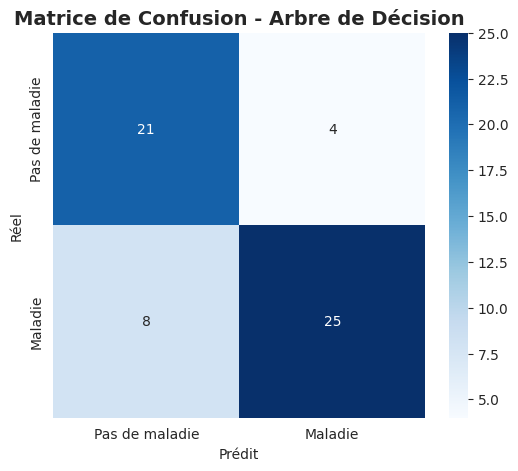

In [ ]:
# ----------------------------
# Matrice de confusion - Arbre de Décision
# ----------------------------
from sklearn.metrics import confusion_matrix
import seaborn as sns

# Prédictions
dt_predict = dt.predict(X_test)
cm_dt = confusion_matrix(y_test, dt_predict)

# Graphique
plt.figure(figsize=(6, 5))
sns.heatmap(cm_dt, annot=True, fmt='d', cmap='Blues',
            xticklabels=['Pas de maladie', 'Maladie'],
            yticklabels=['Pas de maladie', 'Maladie'])
plt.title('Matrice de Confusion - Arbre de Décision', fontsize=14, fontweight='bold')
plt.xlabel('Prédit')
plt.ylabel('Réel')
#plt.savefig('DT/confusion.png', dpi=300, bbox_inches='tight')
plt.show()

In [ ]:
#----------------------------
# Support Vector Classifier
#----------------------------

m7 = 'Support Vector Classifier'
svc =  SVC(kernel='rbf', C=2)
svc.fit(X_train, y_train)
svc_predicted = svc.predict(X_test)
svc_conf_matrix = confusion_matrix(y_test, svc_predicted)
svc_acc_score = accuracy_score(y_test, svc_predicted)
print("confussion matrix")
print(svc_conf_matrix)
print("\n")
print("Accuracy of Support Vector Classifier:",svc_acc_score*100,'\n')
print(classification_report(y_test,svc_predicted))

confussion matrix
[[10 15]
 [ 9 24]]


Accuracy of Support Vector Classifier: 58.620689655172406 

              precision    recall  f1-score   support

           0       0.53      0.40      0.45        25
           1       0.62      0.73      0.67        33

    accuracy                           0.59        58
   macro avg       0.57      0.56      0.56        58
weighted avg       0.58      0.59      0.58        58



Accuracy of SVM: 58.620689655172406 

              precision    recall  f1-score   support

           0       0.53      0.36      0.43        25
           1       0.61      0.76      0.68        33

    accuracy                           0.59        58
   macro avg       0.57      0.56      0.55        58
weighted avg       0.58      0.59      0.57        58



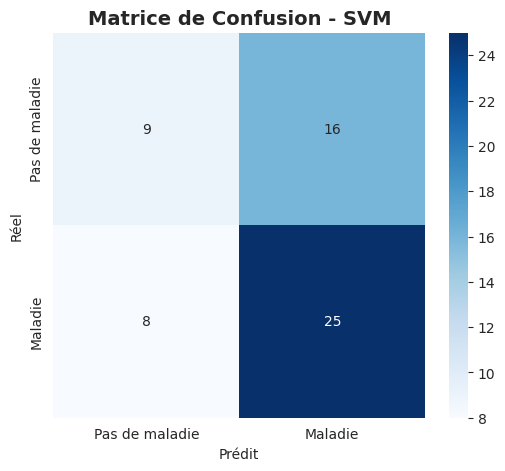

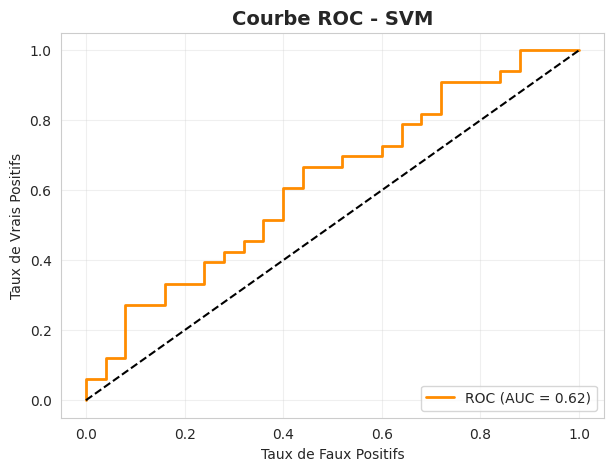

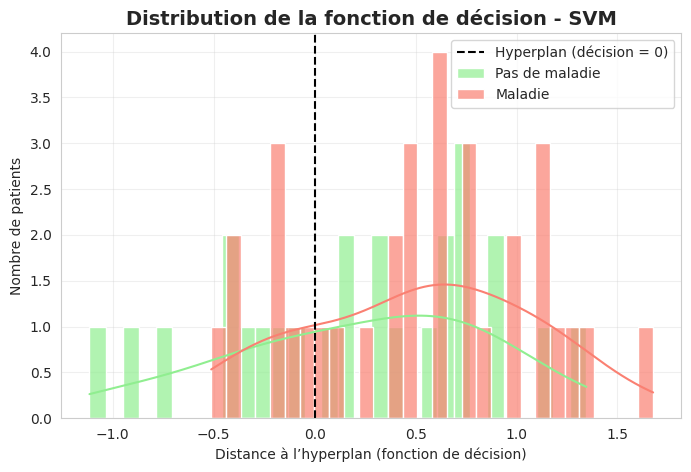

<Figure size 800x600 with 0 Axes>

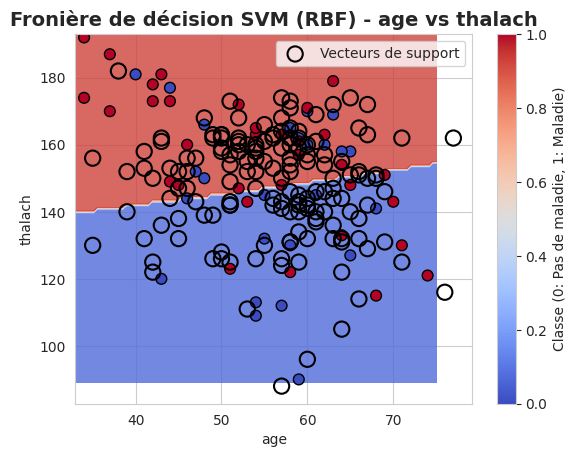

In [ ]:
# ----------------------------
# Machines à Vecteurs de Support (SVM)
# ----------------------------
from sklearn.svm import SVC
from sklearn.inspection import DecisionBoundaryDisplay
import numpy as np

# SVM avec noyau RBF (le plus courant pour données non linéaires)
m4 = 'Support Vector Machine'
svc = SVC(kernel='rbf', C=1.0, gamma='scale', probability=True, random_state=42)
svc.fit(X_train, y_train)
svc_predict = svc.predict(X_test)
svc_acc_score = accuracy_score(y_test, svc_predict)

print("Accuracy of SVM:", svc_acc_score*100, '\n')
print(classification_report(y_test, svc_predict))

y_prob_svc = svc.predict_proba(X_test)[:, 1]
y_pred_svc = svc.predict(X_test)

# Dossier
os.makedirs('SVM', exist_ok=True)

# 1. Matrice de confusion
cm_svc = confusion_matrix(y_test, y_pred_svc)
plt.figure(figsize=(6, 5))
sns.heatmap(cm_svc, annot=True, fmt='d', cmap='Blues',
            xticklabels=['Pas de maladie', 'Maladie'],
            yticklabels=['Pas de maladie', 'Maladie'])
plt.title('Matrice de Confusion - SVM', fontsize=14, fontweight='bold')
plt.xlabel('Prédit')
plt.ylabel('Réel')
plt.savefig('SVM/confusion.png', dpi=300, bbox_inches='tight')
plt.show()

# 2. Courbe ROC
fpr_svc, tpr_svc, _ = roc_curve(y_test, y_prob_svc)
roc_auc_svc = auc(fpr_svc, tpr_svc)
plt.figure(figsize=(7, 5))
plt.plot(fpr_svc, tpr_svc, color='darkorange', lw=2, label=f'ROC (AUC = {roc_auc_svc:.2f})')
plt.plot([0, 1], [0, 1], 'k--')
plt.xlabel('Taux de Faux Positifs')
plt.ylabel('Taux de Vrais Positifs')
plt.title('Courbe ROC - SVM', fontsize=14, fontweight='bold')
plt.legend(loc="lower right")
plt.grid(True, alpha=0.3)
plt.savefig('SVM/roc.png', dpi=300, bbox_inches='tight')
plt.show()


# 4. GRAPHIQUE PROPRE À SVM : Distance à l'hyperplan (décision function)
decision_scores = svc.decision_function(X_test)

plt.figure(figsize=(8, 5))
sns.histplot(decision_scores[y_test == 0], bins=30, alpha=0.7, label='Pas de maladie', color='lightgreen', kde=True)
sns.histplot(decision_scores[y_test == 1], bins=30, alpha=0.7, label='Maladie', color='salmon', kde=True)
plt.axvline(0, color='black', linestyle='--', label='Hyperplan (décision = 0)')
plt.xlabel('Distance à l’hyperplan (fonction de décision)')
plt.ylabel('Nombre de patients')
plt.title('Distribution de la fonction de décision - SVM', fontsize=14, fontweight='bold')
plt.legend()
plt.grid(True, alpha=0.3)
plt.savefig('SVM/decision_function.png', dpi=300, bbox_inches='tight')
plt.show()
# ----------------------------
# GRAPHIQUE PROPRE À SVM : Frontière de décision (2D)
# ----------------------------
feature1, feature2 = 'age', 'thalach'
X_vis_train = X_train[[feature1, feature2]]
X_vis_test = X_test[[feature1, feature2]]

# Ré-entraîner un SVM **uniquement sur ces 2 variables** pour la visualisation
svc_2d = SVC(kernel='rbf', C=1.0, gamma='scale', probability=True, random_state=42)
svc_2d.fit(X_vis_train, y_train)

# Prédiction sur le test (2D)
y_pred_2d = svc_2d.predict(X_vis_test)

plt.figure(figsize=(8, 6))
DecisionBoundaryDisplay.from_estimator(
    svc_2d, X_vis_test, cmap='coolwarm', alpha=0.8, response_method="predict",
    xlabel=feature1, ylabel=feature2
)

# Points de test
scatter = plt.scatter(X_vis_test[feature1], X_vis_test[feature2], c=y_test, cmap='coolwarm', edgecolors='k', s=60)

# Vecteurs de support (dans l'espace 2D)
support_2d = svc_2d.support_vectors_
plt.scatter(support_2d[:, 0], support_2d[:, 1],
            s=120, facecolors='none', edgecolors='black', linewidths=1.5, label='Vecteurs de support')

plt.title('Fronière de décision SVM (RBF) - age vs thalach', fontsize=14, fontweight='bold')
plt.legend()
plt.colorbar(scatter, label='Classe (0: Pas de maladie, 1: Maladie)')
plt.savefig('SVM/decision_boundary.png', dpi=300, bbox_inches='tight')
plt.show()

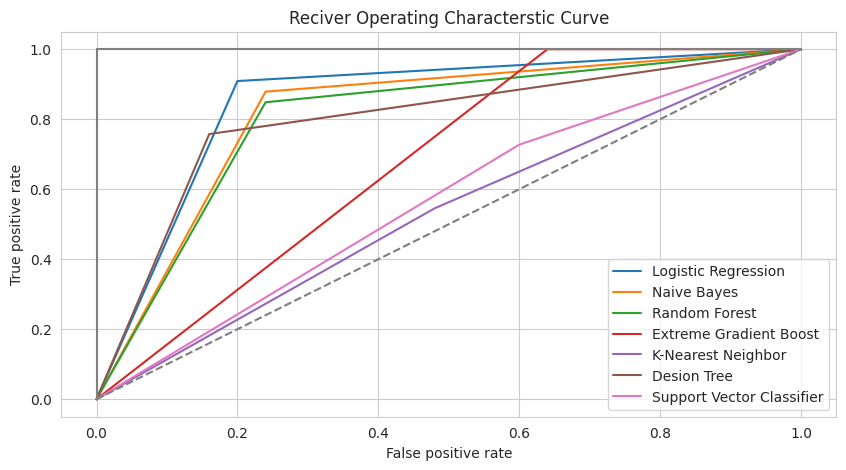

In [ ]:
#-------------------------------------------------
# Visualisation de la performance de chaque modèle
#-------------------------------------------------

lr_false_positive_rate,lr_true_positive_rate,lr_threshold = roc_curve(y_test,lr_predict)
nb_false_positive_rate,nb_true_positive_rate,nb_threshold = roc_curve(y_test,nbpred)
rf_false_positive_rate,rf_true_positive_rate,rf_threshold = roc_curve(y_test,rf_predicted)
xgb_false_positive_rate,xgb_true_positive_rate,xgb_threshold = roc_curve(y_test,xgb_predicted)
knn_false_positive_rate,knn_true_positive_rate,knn_threshold = roc_curve(y_test,knn_predicted)
dt_false_positive_rate,dt_true_positive_rate,dt_threshold = roc_curve(y_test,dt_predicted)
svc_false_positive_rate,svc_true_positive_rate,svc_threshold = roc_curve(y_test,svc_predicted)

sns.set_style('whitegrid')
plt.figure(figsize=(10,5))
plt.title('Reciver Operating Characterstic Curve')
plt.plot(lr_false_positive_rate,lr_true_positive_rate,label='Logistic Regression')
plt.plot(nb_false_positive_rate,nb_true_positive_rate,label='Naive Bayes')
plt.plot(rf_false_positive_rate,rf_true_positive_rate,label='Random Forest')
plt.plot(xgb_false_positive_rate,xgb_true_positive_rate,label='Extreme Gradient Boost')
plt.plot(knn_false_positive_rate,knn_true_positive_rate,label='K-Nearest Neighbor')
plt.plot(dt_false_positive_rate,dt_true_positive_rate,label='Desion Tree')
plt.plot(svc_false_positive_rate,svc_true_positive_rate,label='Support Vector Classifier')
plt.plot([0,1],ls='--')
plt.plot([0,0],[1,0],c='.5')
plt.plot([1,1],c='.5')
plt.ylabel('True positive rate')
plt.xlabel('False positive rate')
plt.legend()
plt.show()

In [ ]:
#----------------------------
# Model Evaluation
#----------------------------

model_ev = pd.DataFrame({'Model': ['Logistic Regression','Naive Bayes','Random Forest','Extreme Gradient Boost',
                    'K-Nearest Neighbour','Decision Tree','Support Vector Machine'], 'Accuracy': [lr_acc_score*100,
                    nb_acc_score*100,rf_acc_score*100,xgb_acc_score*100,knn_acc_score*100,dt_acc_score*100,svc_acc_score*100]})
model_ev

,Model,Accuracy
0,Logistic Regression,86.206897
1,Naive Bayes,82.758621
2,Random Forest,81.034483
3,Extreme Gradient Boost,72.413793
4,K-Nearest Neighbour,55.172414
5,Decision Tree,79.310345
6,Support Vector Machine,58.620690


In [ ]:
import joblib

# Sauvegarde du meilleur modèle (Logistic Regression)
joblib.dump(lr, 'model_heart_disease.pkl')
print("✅ Modèle sauvegardé sous 'model_heart_disease.pkl'")


✅ Modèle sauvegardé sous 'model_heart_disease.pkl'
